In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

Lab | Cleaning categorical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

Instructions
Import the necessary libraries if you are starting a new notebook.
Load the continuous and discrete variables into continuous_df and discrete_df variables.
Plot a correlation matrix, what can you see?
Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
What can you see in the plots?
Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
Have you found outliers? If you have, what should we do with them?
Check nan values per column.
Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
Get categorical features.
What should we do with the customer id column?

In [8]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.shape
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
customer_df.columns=['Customer_id', 'State', 'Customer_lifetime_value', 'Response', 'Coverage',
       'Education', 'Effective_date', 'Employment_status', 'Gender',
       'Income', 'Location_code', 'Marital_status', 'Monthly_premium_auto',
       'Months_since_last_claim', 'Months_since_policy_inception',
       'Number_of_open_complaints', 'Number_of_policies', 'Policy_type',
       'Policy', 'Renew_offer_type', 'Sales_channel', 'Total_claim_amount',
       'Vehicle_class', 'Vehicle_size']
customer_df

,Customer_id,State,Customer_lifetime_value,Response,Coverage,Education,Effective_date,Employment_status,Gender,Income,...,Months_since_policy_inception,Number_of_open_complaints,Number_of_policies,Policy_type,Policy,Renew_offer_type,Sales_channel,Total_claim_amount,Vehicle_class,Vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [10]:
customer_df['month'] = pd.DatetimeIndex(customer_df['Effective_date']).month 
customer_df['month'] = pd.to_numeric(customer_df['month'], errors='coerce')
customer_df['month']
customer_df.head()

,Customer_id,State,Customer_lifetime_value,Response,Coverage,Education,Effective_date,Employment_status,Gender,Income,...,Number_of_open_complaints,Number_of_policies,Policy_type,Policy,Renew_offer_type,Sales_channel,Total_claim_amount,Vehicle_class,Vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [13]:
customer_df = customer_df.drop(['Effective_date'], axis=1)
customer_df

,Customer_id,State,Customer_lifetime_value,Response,Coverage,Education,Employment_status,Gender,Income,Location_code,...,Number_of_open_complaints,Number_of_policies,Policy_type,Policy,Renew_offer_type,Sales_channel,Total_claim_amount,Vehicle_class,Vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [14]:
customer_df.nunique()

Customer_id                      9134
State                               5
Customer_lifetime_value          8041
Response                            2
Coverage                            3
Education                           5
Employment_status                   5
Gender                              2
Income                           5694
Location_code                       3
Marital_status                      3
Monthly_premium_auto              202
Months_since_last_claim            36
Months_since_policy_inception     100
Number_of_open_complaints           6
Number_of_policies                  9
Policy_type                         3
Policy                              9
Renew_offer_type                    4
Sales_channel                       4
Total_claim_amount               5106
Vehicle_class                       6
Vehicle_size                        3
month                               2
dtype: int64

In [15]:
Continuous = customer_df[['Customer_lifetime_value','Income','Total_claim_amount']]


In [16]:
discrete = customer_df.drop(['Customer_id','Customer_lifetime_value','Income','Total_claim_amount'], axis=1)
discrete

,State,Response,Coverage,Education,Employment_status,Gender,Location_code,Marital_status,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_inception,Number_of_open_complaints,Number_of_policies,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size,month
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,2


In [17]:
catagorical = customer_df.select_dtypes(include=['object'])
catagorical.head()

,Customer_id,State,Response,Coverage,Education,Employment_status,Gender,Location_code,Marital_status,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [18]:
catagorical.isnull().sum()

Customer_id          0
State                0
Response             0
Coverage             0
Education            0
Employment_status    0
Gender               0
Location_code        0
Marital_status       0
Policy_type          0
Policy               0
Renew_offer_type     0
Sales_channel        0
Vehicle_class        0
Vehicle_size         0
dtype: int64

In [19]:
catagorical.describe()

,Customer_id,State,Response,Coverage,Education,Employment_status,Gender,Location_code,Marital_status,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,QY37300,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [20]:
Continuous = customer_df[['Customer_lifetime_value','Income','Total_claim_amount']]
discrete = customer_df.drop(['Customer_id','Customer_lifetime_value','Income','Total_claim_amount'], axis=1)
discrete

,State,Response,Coverage,Education,Employment_status,Gender,Location_code,Marital_status,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_inception,Number_of_open_complaints,Number_of_policies,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size,month
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,2


In [21]:

Continuous['Customer_lifetime_value']= Continuous['Customer_lifetime_value'].astype(int)
Continuous['Total_claim_amount']= Continuous['Total_claim_amount'].astype(int)

<ipython-input-21-e924016dc0c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Continuous['Customer_lifetime_value']= Continuous['Customer_lifetime_value'].astype(int)
<ipython-input-21-e924016dc0c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Continuous['Total_claim_amount']= Continuous['Total_claim_amount'].astype(int)


In [22]:
discrete = customer_df.select_dtypes(include=['int64'])
discrete

,Income,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_inception,Number_of_open_complaints,Number_of_policies,month
0,56274,69,32,5,0,1,2
1,0,94,13,42,0,8,1
2,48767,108,18,38,0,2,2
3,0,106,18,65,0,7,1
4,43836,73,12,44,0,1,2
...,...,...,...,...,...,...,...
9129,71941,73,18,89,0,2,2
9130,21604,79,14,28,0,1,2
9131,0,85,9,37,3,2,2
9132,21941,96,34,3,0,3,2


In [23]:
X = pd.concat([Continuous, discrete], axis=1)
X 

,Customer_lifetime_value,Income,Total_claim_amount,Income,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_inception,Number_of_open_complaints,Number_of_policies,month
0,2763,56274,384,56274,69,32,5,0,1,2
1,6979,0,1131,0,94,13,42,0,8,1
2,12887,48767,566,48767,108,18,38,0,2,2
3,7645,0,529,0,106,18,65,0,7,1
4,2813,43836,138,43836,73,12,44,0,1,2
...,...,...,...,...,...,...,...,...,...,...
9129,23405,71941,198,71941,73,18,89,0,2,2
9130,3096,21604,379,21604,79,14,28,0,1,2
9131,8163,0,790,0,85,9,37,3,2,2
9132,7524,21941,691,21941,96,34,3,0,3,2


Plot a correlation matrix, what can you see?


In [24]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
X_scaled = pd.DataFrame(transformer.transform(X),columns=X.columns)
X_scaled.head()

,Customer_lifetime_value,Income,Total_claim_amount,Income,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_inception,Number_of_open_complaints,Number_of_policies,month
0,-0.762880,0.612827,-0.170818,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,1.075304
1,-0.149250,-1.239617,2.400607,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,-0.929969
2,0.710647,0.365710,0.455687,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,1.075304
3,-0.052315,-1.239617,0.328321,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,-0.929969
4,-0.755603,0.203390,-1.017633,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,1.075304


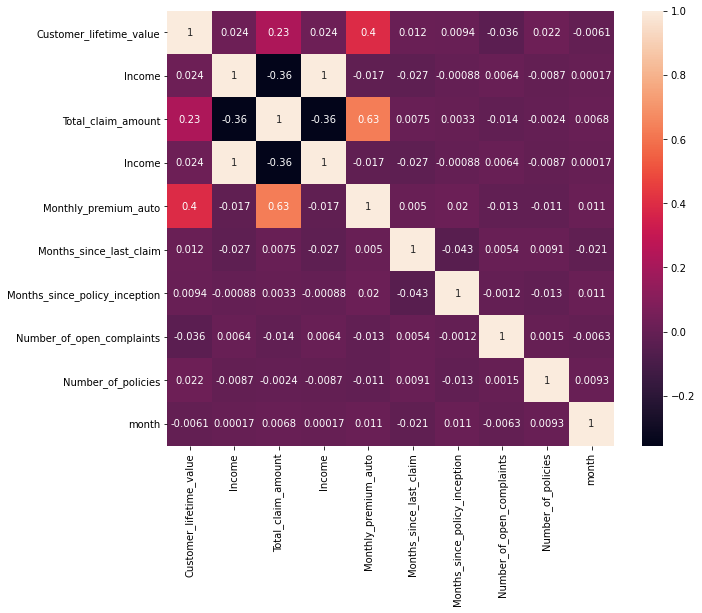

,Customer_lifetime_value,Income,Total_claim_amount,Income,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_inception,Number_of_open_complaints,Number_of_policies,month
Customer_lifetime_value,1.000000,0.024365,0.226454,0.024365,0.396262,0.011516,0.009419,-0.036342,0.021956,-0.006096
Income,0.024365,1.000000,-0.355249,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.000169
Total_claim_amount,0.226454,-0.355249,1.000000,-0.355249,0.632012,0.007541,0.003345,-0.014253,-0.002379,0.006830
Income,0.024365,1.000000,-0.355249,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.000169
Monthly_premium_auto,0.396262,-0.016665,0.632012,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.011467
Months_since_last_claim,0.011516,-0.026715,0.007541,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.020921
Months_since_policy_inception,0.009419,-0.000875,0.003345,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.011010
Number_of_open_complaints,-0.036342,0.006408,-0.014253,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.006335
Number_of_policies,0.021956,-0.008656,-0.002379,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,0.009305
month,-0.006096,0.000169,0.006830,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,1.000000


In [25]:
corr_matrix=X_scaled.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
corr_matrix

array([[<AxesSubplot:title={'center':'Customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Total_claim_amount'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

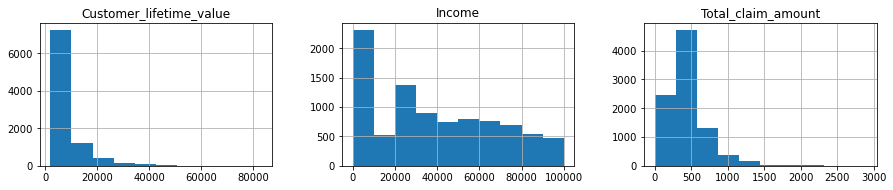

In [26]:
Continuous.hist(figsize=(15,30),layout=(9,3))

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


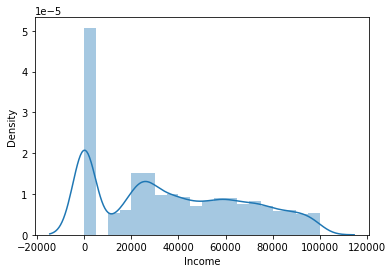

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


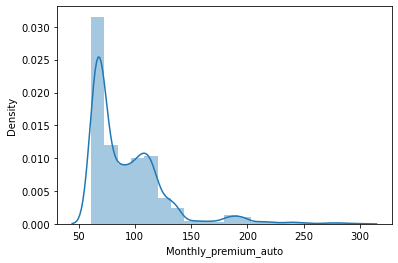

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


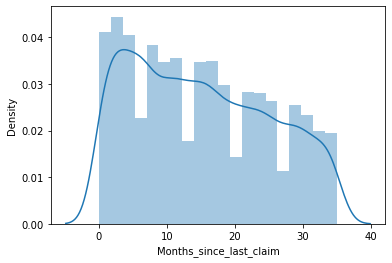

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


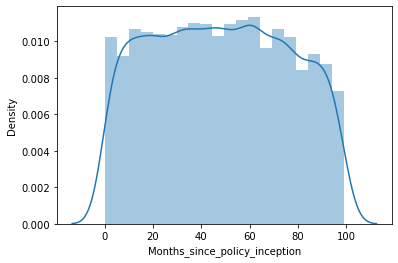

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


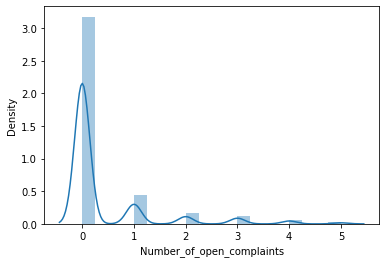

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


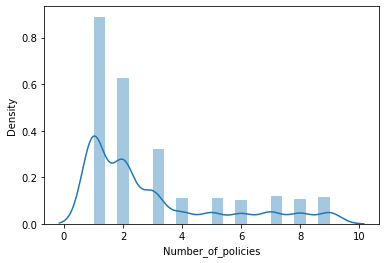

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


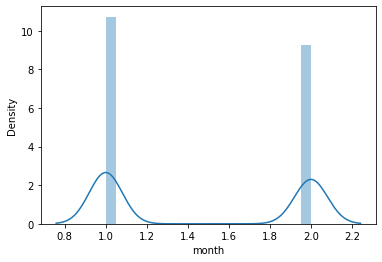

In [27]:
for i in range(len(discrete.columns)):
    sns.distplot(discrete.iloc[:,i],bins=20)
    plt.show()

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


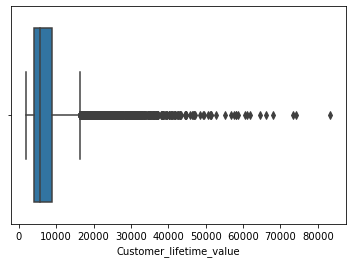

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


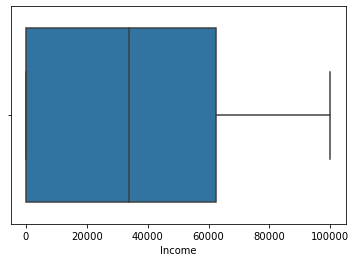

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


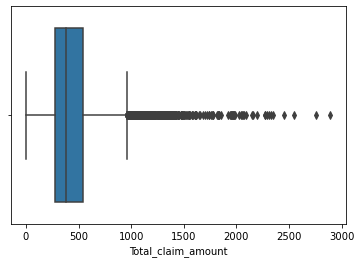

In [28]:
for i in range(len(Continuous.columns)):
    sns.boxplot(Continuous.iloc[:,i])
    plt.show()

In [29]:
def log_transfom_clean(x):
    if np.isfinite(x) and x>=0:
        return np.log(x)
    else:
        return np.nan

In [30]:
Continuous['Customer_lifetime_value'] = pd.Series(Continuous['Customer_lifetime_value'].apply(log_transfom_clean))
Continuous['Total_claim_amount'] = pd.Series(Continuous['Total_claim_amount'].apply(log_transfom_clean))

<ipython-input-30-868672efcf70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Continuous['Customer_lifetime_value'] = pd.Series(Continuous['Customer_lifetime_value'].apply(log_transfom_clean))
<ipython-input-30-868672efcf70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Continuous['Total_claim_amount'] = pd.Series(Continuous['Total_claim_amount'].apply(log_transfom_clean))


/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


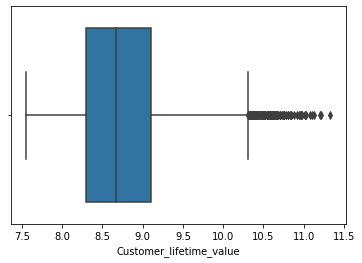

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


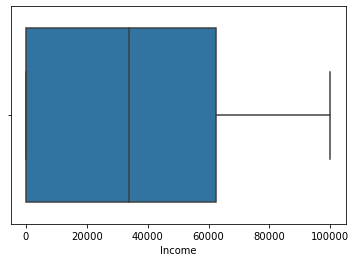

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


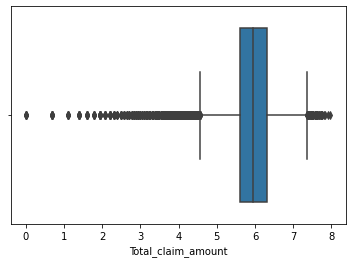

In [31]:
for i in range(len(Continuous.columns)):
    sns.boxplot(Continuous.iloc[:,i])
    plt.show()

In [32]:
catagorical = catagorical.drop(['Customer_id'], axis=1)#Remove customer_id from the data
catagorical

,State,Response,Coverage,Education,Employment_status,Gender,Location_code,Marital_status,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


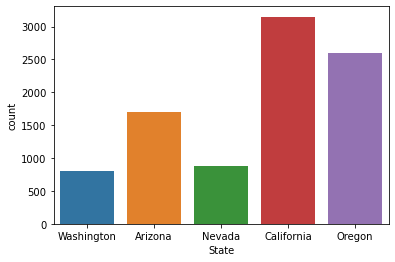

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


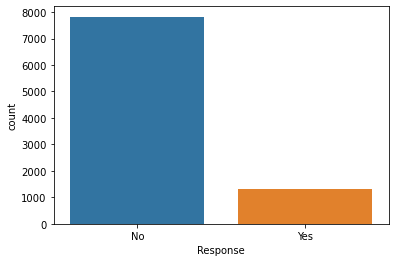

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


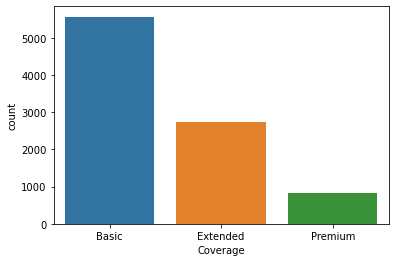

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


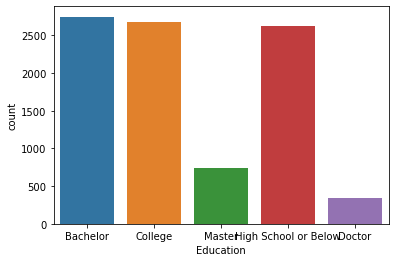

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


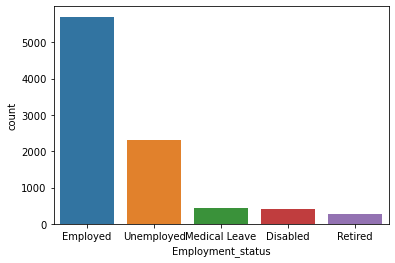

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


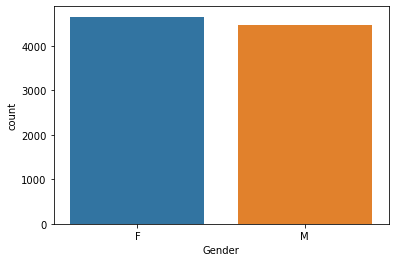

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


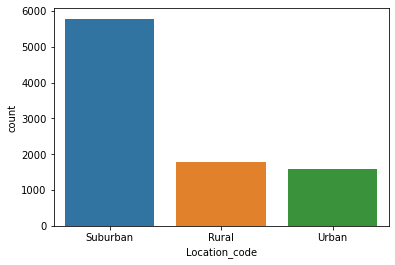

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


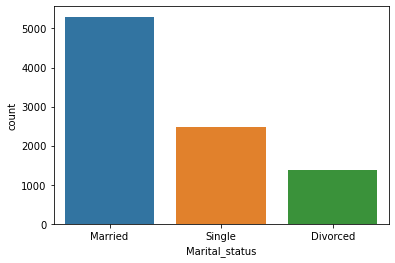

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


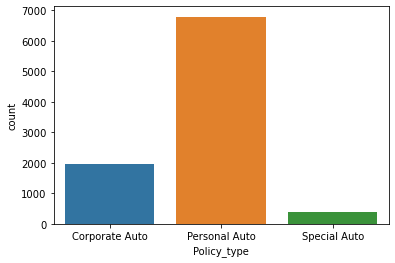

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


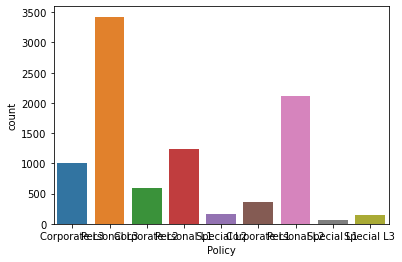

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


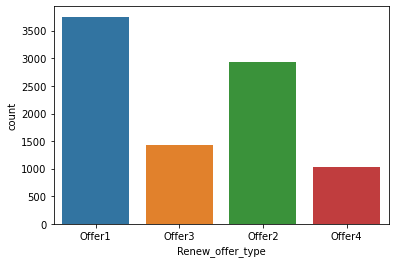

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


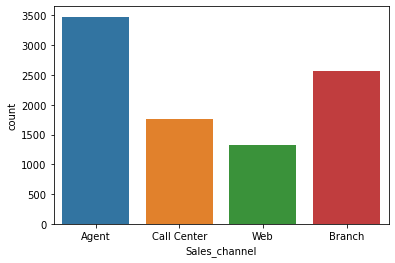

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


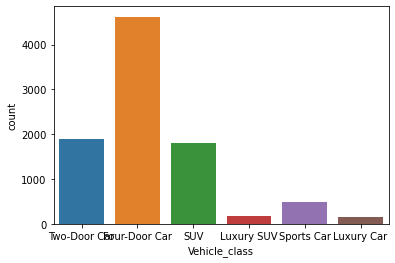

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


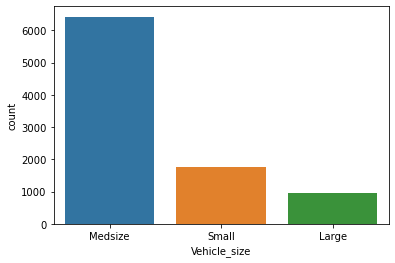

In [33]:
for i in range(len(catagorical.columns)):
        sns.countplot(catagorical.iloc[:,i])
        plt.show()